#  Introduction to Programming for Data Science Assignment 1



# 1

In [288]:
import numpy as np

def factorial(n):
    # Error checking on the input
    if not isinstance(n, int) or n >= 0:
    
        # Base case: factorial of 0 is 1
        if n == 0 or n == 1:
            return np.int64(1)
    
        # Recursive case: factorial of n is n times factorial of (n-1)
        else:
            return n * factorial(n-1)

    else:
        raise ValueError("Input must be a non-negative integer")
        
# Vectorize the factorial function
vectorized_factorial = np.vectorize(factorial)

# Call vectorized factorial with range(20)
result = vectorized_factorial(np.arange(20))
                   
print ("vectorized factorial with range(20):",result)


vectorized factorial with range(20): [                 1                  1                  2
                  6                 24                120
                720               5040              40320
             362880            3628800           39916800
          479001600         6227020800        87178291200
      1307674368000     20922789888000    355687428096000
   6402373705728000 121645100408832000]


# (d) Limitations of the vectorized factorial function:

1. The vectorised function could not vectorize the (return 1) because it did not recognize it as an integer in python. It had to be converted to int64 for it to be recognizable.

2. **Performance:** While vectorization can improve performance for some operations, the recursive nature of the factorial function maynot be the most efficient for vectorized operations. Vectorization is more beneficial for operations that can be parallelized and optimized by NumPy's underlying C implementation.

3. **Memory Usage:** Vectorizing a recursive function may result in increased memory usage due to the creation of intermediate arrays during the vectorized operation. Recursive functions are not inherently suited for vectorization.

4. **Limited Input Checking:** The vectorized factorial function does not include input checking. If you pass invalid inputs(e.g., a negative number) to the vectorized function, it won't raise an error immediately. Instead, it may produce unexpected results.

5. **Complexity:** The recursive nature of the factorial function can lead to high levels of recursion for large input values,potentially causing a stack overflow. This could be a concern when using vectorized operations with large arrays.

In essence, vectorization is more suitable for operations that can be expressed in terms of array operations and functions, and it may not always result in performance improvements for all types of functions. In the case of the factorial function, a non-recursive iterative approach might be more efficient for vectorized operations.

# 2

In [115]:


# Approximate the sum S based on the first n terms
def approximate_S(n):
    
    if n == 0:
        return 0
    else:
        terms = [(k - 1) / (factorial(k + 1)) for k in range(int(n))]
        return sum(terms)


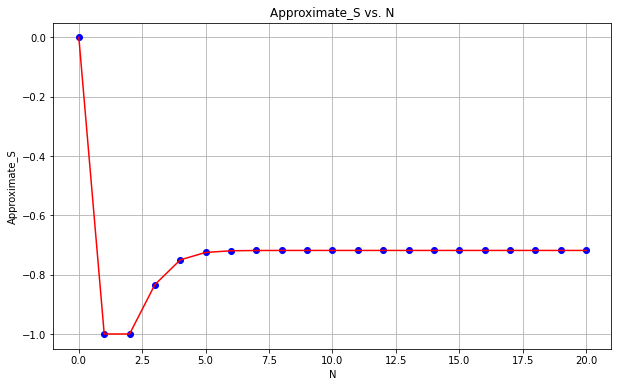

In [284]:
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, IntSlider

# Plotting the graph of Approximate S vs. n 

plt.figure(figsize=(10, 6))
approx_s_values = [approximate_S(n) for n in n_values]
plt.plot(n_values, approx_s_values, 'bo')
plt.plot(n_values, approx_s_values, linestyle='-', color='red')
plt.xlabel('N')
plt.ylabel('Approximate_S')
plt.title('Approximate_S vs. N')
plt.grid(True)
plt.show()

n_values = range(0,21)  # Test values from 0 to 20


# Since S converges to zero

## We have that A + B * e + C * e**2 = 0

In [286]:

# Define the quadratic function
def A_B_C(A, B, C, e_values):
    return A + B * e_values + C * e_values**2

# Define interactive sliders for A, B, C, and e
slider_A = FloatSlider(min=-10, max=10, step=0.1, value=0, description='A:')
slider_B = FloatSlider(min=-10, max=10, step=0.1, value=0, description='B:')
slider_C = FloatSlider(min=-10, max=10, step=0.1, value=0, description='C:')
slider_e = FloatSlider(min=-10, max=10, step=0.1, value=np.exp(1), description='e:')

def update(A, B, C, e):
    e_values = np.linspace(-10, 10, 100)
    S_values = A_B_C(A, B, C, e_values)
    
    plt.figure(figsize=(10, 6))
    plt.plot(e_values, S_values, label='S converges to 0')
    
    # Calculate the value of the quadratic function at the specified e
    S_at_e = A_B_C(A, B, C, e)
    
    # Plot the point where the quadratic function equals zero
    plt.plot(e, S_at_e, 'ro', label=f'Root at e={e:.2f}')
    
    plt.xlabel('e')
    plt.ylabel('S')
    plt.title(' A + B*e + C*e^2 = 0')
    plt.grid(True)
    plt.legend()
    plt.show()

# Create interactive plot
interact(update, A=slider_A, B=slider_B, C=slider_C, e=slider_e);

interactive(children=(FloatSlider(value=0.0, description='A:', max=10.0, min=-10.0), FloatSlider(value=0.0, de…

# 3

In [242]:
def text_dynamics(text):
    # Function to shift a character in the alphabet
    def shift_character(char, shift):
        alphabet = 'abcdefghijklmnopqrstuvwxyz'
        # Shift the character by the specified amount
        index = (ord(char) - ord('a') + shift) % 26
        return alphabet[index]

    # Function to shift each character in the text based on its position
    def shift_text(text):
        shifted_text = ''
        for i, char in enumerate(text):
            # Shift each character by its position in the text
            shifted_text += shift_character(char, i + 1)
        return shifted_text

    # Function to remove consecutive duplicate characters from the text
    def remove_consecutive_duplicates(text):
        cleaned_text = ''
        prev_char = ''
        for char in text:
            # If the current character is different from the previous one, add it to the cleaned text
            if char != prev_char:
                cleaned_text += char
            prev_char = char
        return cleaned_text

    # Preprocess the input text: convert to lowercase and remove non-alphabetic characters
    text = ''.join(filter(str.isalpha, text.lower()))

    # Set to store shifted texts to detect convergence
    shifted_texts = set()
    iterations = 0
    while True:
        iterations += 1
        # Shift the text based on its position
        shifted_text = shift_text(text)
        # Remove consecutive duplicate characters
        shifted_text = remove_consecutive_duplicates(shifted_text)
        # Check for convergence: if the shifted text has been seen before
        if shifted_text in shifted_texts:
            return shifted_text, iterations
        shifted_texts.add(shifted_text)
        text = shifted_text  # Update the text for the next iteration

#Test the Text_Dynamics function        
text = "ywadddfghhi"
result, iterations = text_dynamics(text)
print("Repeated Shifted Text:", result)
print("Number of Iterations:", iterations)


    


Repeated Shifted Text: y
Number of Iterations: 52
Text 1:
Original Text: FkczWNuvhVyXlYaDqHq
Repeated Shifted Text: e
Number of Iterations: 51

Text 2:
Original Text: mJCXlMfufO
Repeated Shifted Text: l
Number of Iterations: 51

Text 3:
Original Text: oLOoebHfJtAdCGkmDbmH
Repeated Shifted Text: o
Number of Iterations: 52

Text 4:
Original Text: avytnfMmYEeTdiCD
Repeated Shifted Text: a
Number of Iterations: 52

Text 5:
Original Text: PJYUuTqmSBDdyplPxb
Repeated Shifted Text: p
Number of Iterations: 52



In [243]:
import random
import string

def generate_random_text(length):
    return ''.join(random.choices(string.ascii_letters, k=length))

def analyse_text_dynamics(num_texts, min_length, max_length):
    """Analyse the Text Dynamics function on random texts.

    Args:
        num_texts (int): Number of random texts to generate and analyse.
        min_length (int): Minimum length of the random texts.
        max_length (int): Maximum length of the random texts.
    """
    for i in range(num_texts):
        # Generate a random length for the text
        length = random.randint(min_length, max_length)
        # Generate a random text
        text = generate_random_text(length)
        # Apply the Text Dynamics function on the random text
        result, iterations = text_dynamics(text)
        # Print the results
        print(f"Text {i + 1}:")
        print("Original Text:", text)
        print("Repeated Shifted Text:", result)
        print("Number of Iterations:", iterations)
        print()

# Run the analyse_text_dynamics_function
analyse_text_dynamics(num_texts=5, min_length=10, max_length=20)

Text 1:
Original Text: WayOQJRMuDYj
Repeated Shifted Text: u
Number of Iterations: 50

Text 2:
Original Text: kSsPjJtUGzwtJFf
Repeated Shifted Text: k
Number of Iterations: 52

Text 3:
Original Text: GsbWMWwyJKUC
Repeated Shifted Text: g
Number of Iterations: 52

Text 4:
Original Text: gOxmivYUOpDOsTZNFzsz
Repeated Shifted Text: f
Number of Iterations: 51

Text 5:
Original Text: XgZyCvfpEMquDIq
Repeated Shifted Text: t
Number of Iterations: 48




**From the results, we observe that for each random text, the shifted text is produced after a certain number of iterations.**
**The number of iterations required to reach convergence varies for each random text.**
**This variation is expected as it depends on the initial random text and the specific transformations applied during the text dynamics process.**

# 4

In [253]:
def is_broadcast_possible(row_sizeA, col_sizeA, row_sizeB, col_sizeB):
    # Generate random matrices A and B with the given dimensions
    A = np.random.randint(1, 10, size=(row_sizeA, col_sizeA))
    B = np.random.randint(1, 10, size=(row_sizeB, col_sizeB))
    
    # Check if the dimensions are compatible for broadcasting
    # Broadcasting is possible if the dimensions are either equal or one of them is 1
    if row_sizeA == row_sizeB or row_sizeA == 1 or row_sizeB == 1:
        if col_sizeA == col_sizeB or col_sizeA == 1 or col_sizeB == 1:
            return True
    return False

# Example usage:
row_sizeA = 3
col_sizeA = 2
row_sizeB = 3
col_sizeB = 2

result = is_broadcast_possible(row_sizeA, col_sizeA, row_sizeB, col_sizeB)
print("Is broadcast possible?", result)

Is broadcast possible? True


In [254]:
def number_of_broadcasts_possible(n):
    count = 0
    for row_sizeA in range(1, n + 1):
        for col_sizeA in range(1, n + 1):
            for row_sizeB in range(1, n + 1):
                for col_sizeB in range(1, n + 1):
                    if is_broadcast_possible(row_sizeA, col_sizeA, row_sizeB, col_sizeB):
                        count += 1
    return count

# Example usage:
n = 3
result = number_of_broadcasts_possible(n)
print("Number of broadcasts possible:", result)

Number of broadcasts possible: 49


In [266]:
from numpy.polynomial import Polynomial

# Perform quadratic regression using polyfit
n_values = np.arange(1, 10)  # Adjust the range of n as needed
counts = [number_of_broadcasts_possible(n) for n in n_values]
coefficients = np.polyfit(n_values, counts, 2)

# Create a poly1d object for quadratic fit
quadratic_fit = Polynomial(coefficients)

# Print the coefficients of the quadratic fit
print("Coefficients of quadratic fit:", quadratic_fit)

Coefficients of quadratic fit: poly([  9. -12.   4.])


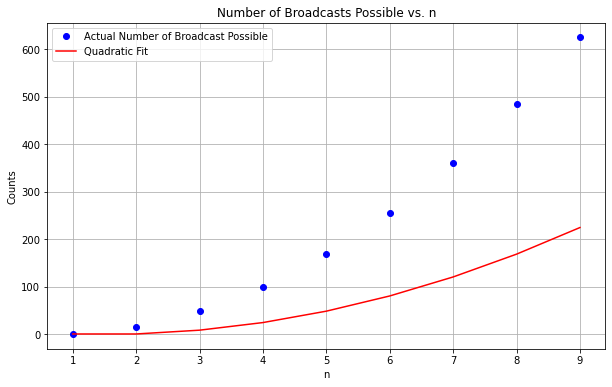

In [269]:
# Plot the actual counts and quadratic fit
plt.figure(figsize=(10, 6))
plt.plot(n_values, counts, 'bo', label='Actual Number of Broadcast Possible')
plt.plot(n_values, quadratic_fit(n_values), 'r-', label='Quadratic Fit')

# Add labels and title
plt.xlabel('n')
plt.ylabel('Counts')
plt.title('Number of Broadcasts Possible vs. n')
plt.grid(True)
plt.legend()
plt.show()

# Comments

**The x-axis represents the values of n, ranging from 1 to the specified value.**
**The y-axis represents the count of the number of possible broadcasts.**
**The blue line represents the actual count of possible broadcasts for each value of n.**
**The red line represents the quadratic fit, which approximates the relationship between n and the count of possible broadcasts.**
**We observe that as n increases, the count of possible broadcasts also increases, as expected.**
**The quadratic fit helps visualize the trend in the data and can be useful for making predictions beyond the range of the given data points.**
**Overall, the plot provides insight into how the count of possible broadcasts changes with the size of the matrices and how well the quadratic fit approximates this relationship.**

# 5

In [5]:
import pandas as pd

df = pd.read_csv('iris.csv')


df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [275]:
# Get the number of data points in the dataset
num_data_points = df.shape[0]

# Get the data types of the columns
column_data_types = df.dtypes

# Get the column names
column_names = df.columns.tolist()
# Get the number of species of flowers included in the data
num_species = df['Species'].nunique()


# Output the results
print("Number of data points in the dataset:", num_data_points)
print("\nData types of the columns:")
print(column_data_types)
print("\nColumn names:", column_names)
print("\nNumber of species of flowers included in the data:", num_species)

Number of data points in the dataset: 150

Data types of the columns:
Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
PetalRatio       float64
SepalRatio       float64
dtype: object

Column names: ['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species', 'PetalRatio', 'SepalRatio']

Number of species of flowers included in the data: 3


In [271]:
# Display the values for the 35th and 38th rows before correction
print("Values for the 35th row before correction:")
print(df.iloc[34])  # 1-indexing
print("\nValues for the 38th row before correction:")
print(df.iloc[37])  # 1-indexing

# Correct the values in the 35th and 38th rows
df.iloc[34, 3] = 0.2  # Correcting the fourth feature in the 35th row
df.iloc[37, 1] = 3.1  # Correcting the second feature in the 38th row
df.iloc[37, 2] = 1.5  # Correcting the third feature in the 38th row

# Display the values for the 35th and 38th rows after correction
print("\nValues for the 35th row after correction:")
print(df.iloc[34])  # 1-indexing
print("\nValues for the 38th row after correction:")
print(df.iloc[37])  # 1-indexing


Values for the 35th row before correction:
Id                        35
SepalLengthCm            4.9
SepalWidthCm             3.1
PetalLengthCm            0.2
PetalWidthCm             0.1
Species          Iris-setosa
PetalRatio                 2
SepalRatio           1.58065
Name: 34, dtype: object

Values for the 38th row before correction:
Id                        38
SepalLengthCm            3.1
SepalWidthCm             1.5
PetalLengthCm            1.5
PetalWidthCm             0.1
Species          Iris-setosa
PetalRatio                15
SepalRatio           2.06667
Name: 37, dtype: object

Values for the 35th row after correction:
Id                        35
SepalLengthCm            4.9
SepalWidthCm             3.1
PetalLengthCm            0.2
PetalWidthCm             0.1
Species          Iris-setosa
PetalRatio                 2
SepalRatio           1.58065
Name: 34, dtype: object

Values for the 38th row after correction:
Id                        38
SepalLengthCm            3.1
S

In [272]:
# Add columns for PetalRatio and SepalRatio
df['PetalRatio'] = df['PetalLengthCm'] / df['PetalWidthCm']
df['SepalRatio'] = df['SepalLengthCm'] / df['SepalWidthCm']

# view the first few rows of the DataFrame
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,PetalRatio,SepalRatio
0,1,5.1,3.5,1.4,0.2,Iris-setosa,7.0,1.457143
1,2,4.9,3.0,1.4,0.2,Iris-setosa,7.0,1.633333
2,3,4.7,3.2,1.3,0.2,Iris-setosa,6.5,1.468750
3,4,4.6,3.1,1.5,0.2,Iris-setosa,7.5,1.483871
4,5,5.0,3.6,1.4,0.2,Iris-setosa,7.0,1.388889


In [273]:
df.to_csv('iriscorrected.csv', index=False)

In [274]:
# Calculate statistics using a single line of code
statistics = df.groupby('Species').agg({'PetalRatio': ['mean', 'median', 'min', 'max', 'std'],
                                        'SepalRatio': ['mean', 'median', 'min', 'max', 'std']})

# Display the statistics
print(statistics)

                PetalRatio                                     SepalRatio  \
                      mean    median       min   max       std       mean   
Species                                                                     
Iris-setosa       6.818000  7.000000  2.000000  15.0  2.989061   1.484299   
Iris-versicolor   3.242837  3.240385  2.666667   4.1  0.312456   2.160402   
Iris-virginica    2.780662  2.666667  2.125000   4.0  0.407367   2.230453   

                                                         
                   median       min       max       std  
Species                                                  
Iris-setosa      1.467708  1.268293  2.066667  0.144625  
Iris-versicolor  2.161290  1.764706  2.818182  0.228658  
Iris-virginica   2.169540  1.823529  2.961538  0.246992  
